## Домашнее задание<a class='anchor' id='hw'>

In [1]:
# Загрузка необходимых библиотек

import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [5]:
# Загрузка данных и выбор первых двух признаков

X, y = load_iris(return_X_y = True)

X = X[:, :2]

# Train, test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Проверка

X_train.shape, X_test.shape

((120, 2), (30, 2))

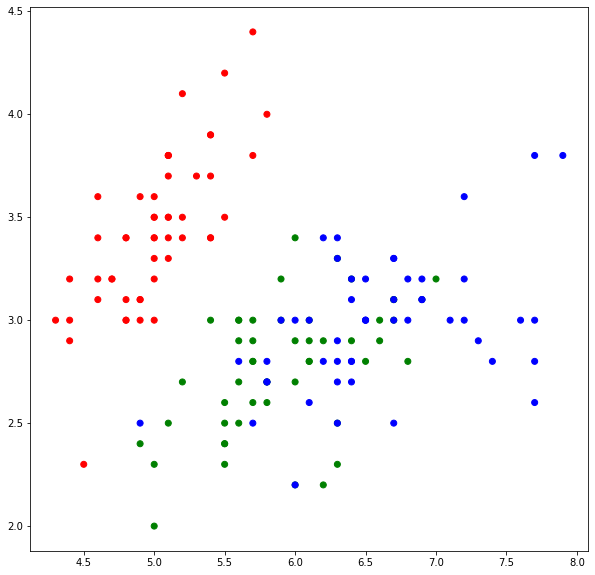

In [4]:
# График

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap)

In [6]:
# Функция для подсчета евклидовой метрики

def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))
    
    e_result = np.sqrt(distance)

    return e_result

In [7]:
# Поиск k ближайших соседей

{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [8]:
# Функция для поиска knn

def knn_neighbours(x_train, y_train, x_test, k):
    
    answers = []
    
    for x in x_test:
        
        test_distances = []
            
        for i in range(len(x_train)):
            
            # Расчет расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # Создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            
            classes[d[1]] += 1/np.sign(d[0])

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key = classes.get)[-1])

    return answers

In [9]:
# Функция для accuracy

def accuracy_metrics(pred, y):
    
    accuracy_result = (sum(pred == y) / len(y))
    
    return accuracy_result

In [12]:
# Проверка при k = 1

k = 1

y_pred = knn_neighbours(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy_metrics(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.567


<ipython-input-8-329a51761a46>:25: RuntimeWarning: divide by zero encountered in double_scalars
  classes[d[1]] += 1/np.sign(d[0])


In [16]:
# График распеределения классов

def get_graph(X_train, y_train, k):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn_neighbours(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize = (10, 10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
(2464, 2)


<ipython-input-16-faa7b73b5c3f>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


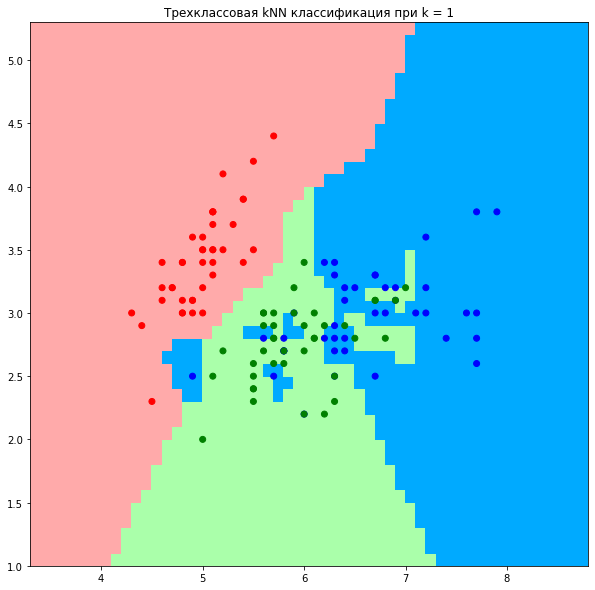

In [17]:
# Проверка результата

%time
get_graph(X_train, y_train, k)

<ipython-input-8-329a51761a46>:25: RuntimeWarning: divide by zero encountered in double_scalars
  classes[d[1]] += 1/np.sign(d[0])


Точность алгоритма при k = 3: 0.667
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
(2464, 2)


<ipython-input-16-faa7b73b5c3f>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


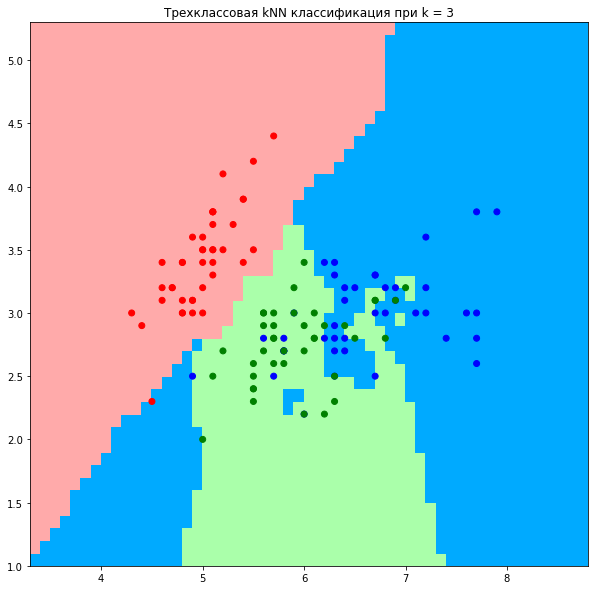

In [20]:
# Проверка при k = 3

k = 3

y_pred = knn_neighbours(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy_metrics(y_pred, y_test):.3f}')

# Проверка

%time
get_graph(X_train, y_train, k)

<ipython-input-8-329a51761a46>:25: RuntimeWarning: divide by zero encountered in double_scalars
  classes[d[1]] += 1/np.sign(d[0])


Точность алгоритма при k = 5: 0.767
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
(2464, 2)


<ipython-input-16-faa7b73b5c3f>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


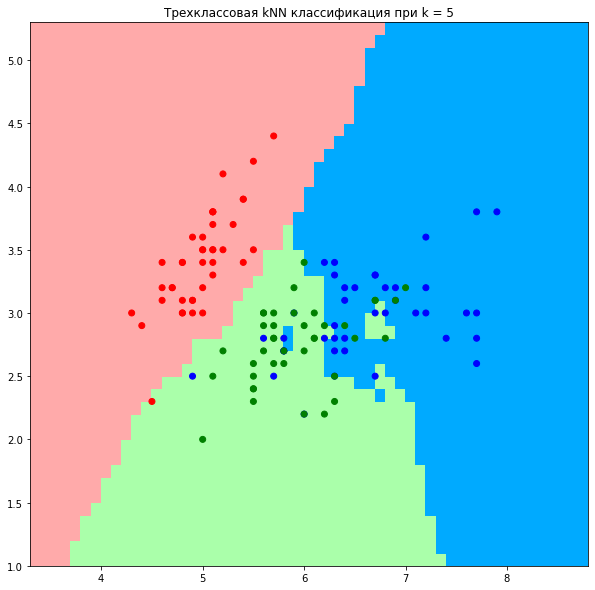

In [21]:
# Проверка при k = 5

k = 5

y_pred = knn_neighbours(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy_metrics(y_pred, y_test):.3f}')

# Проверка

%time
get_graph(X_train, y_train, k)

<ipython-input-8-329a51761a46>:25: RuntimeWarning: divide by zero encountered in double_scalars
  classes[d[1]] += 1/np.sign(d[0])


Точность алгоритма при k = 10: 0.700
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
(2464, 2)


<ipython-input-16-faa7b73b5c3f>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


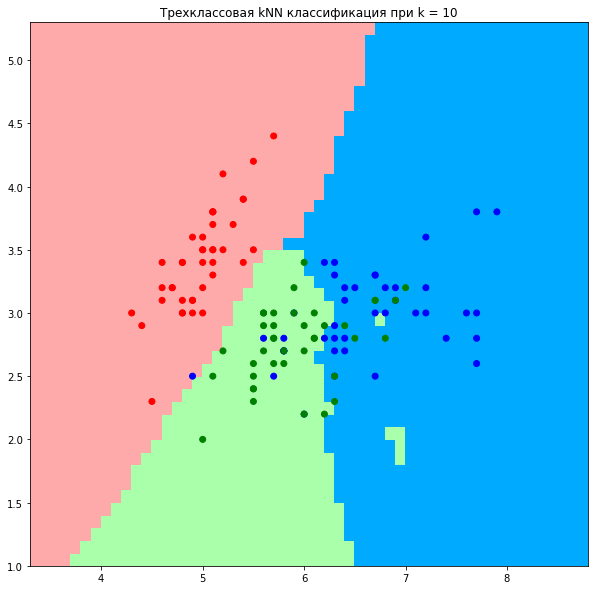

In [22]:
# Проверка при k = 10

k = 10

y_pred = knn_neighbours(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy_metrics(y_pred, y_test):.3f}')

# Проверка

%time
get_graph(X_train, y_train, k)

---

2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

---

3. Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).

---